# Australia’s 50 Richest People

https://www.forbes.com/australia-billionaires/list/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2019

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'australia-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []
worth = []
industry = []


for i in range(50):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  worth.append(r.json()[i]['worth'])
  industry.append(r.json()[i]['source'])

# Create Dataframe

In [5]:
data = {
  'Rank': rank,
  'Name': name,
  'NetWorth': worth,
  'OriginOfWealth': industry
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df.head()

,Rank,Name,NetWorth,OriginOfWealth
0,1,Gina Rinehart,14800.0,mining
1,2,Harry Triguboff,9000.0,real estate
2,3,Anthony Pratt,6800.0,manufacturing
3,4,Frank Lowy,6500.0,shopping malls
4,5,Mike Cannon-Brookes,6400.0,software


In [7]:
df.tail()

,Rank,Name,NetWorth,OriginOfWealth
45,46,Ralph Sarich,810.0,real estate
46,47,Richard Smith,800.0,food distribution
47,48,John Kahlbetzer,770.0,agribusiness
48,49,Chris Morris,760.0,"software, hospitality"
49,50,Michael Heine,750.0,financial services


In [8]:
df.shape

(50, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            50 non-null     int64  
 1   Name            50 non-null     object 
 2   NetWorth        50 non-null     float64
 3   OriginOfWealth  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [10]:
df['Rank'] = df['Rank'].astype('category')                      # change Rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                  17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
                  32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
                  47, 48, 49, 50],
, ordered=False)

In [11]:
df.describe(include='object')

,Name,OriginOfWealth
count,50,50
unique,50,28
top,Gina Rinehart,real estate
freq,1,9


In [12]:
df['OriginOfWealth'].value_counts()

real estate                      9
mining                           6
software                         3
logistics, real estate           2
retail                           2
investment                       2
retailing                        2
casinos                          2
shopping malls                   2
manufacturing                    2
software, hospitality            1
investments                      1
agribusiness                     1
food distribution                1
Food & Beverage                  1
hotels                           1
betting machines                 1
entertainment                    1
telecoms                         1
airports, real estate            1
toys                             1
retail, agribusiness             1
fast food                        1
agriculture/real estate          1
manufacturing, investment        1
Investment                       1
construction equipment, media    1
financial services               1
Name: OriginOfWealth

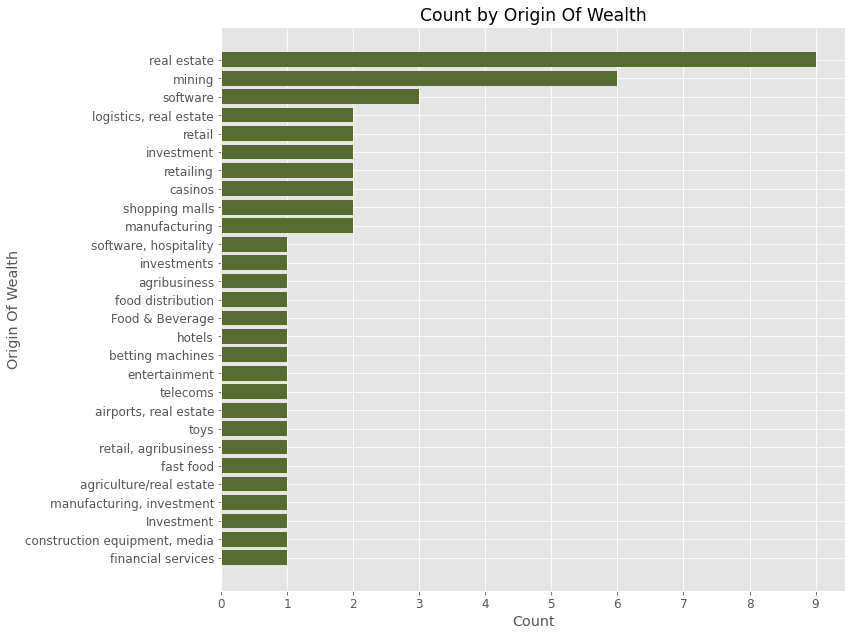

In [13]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['OriginOfWealth'].value_counts().keys(), width=df['OriginOfWealth'].value_counts().values, color='darkolivegreen', align='center')
ax.set(title='Count by Origin Of Wealth', xlabel='Count', ylabel='Origin Of Wealth')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [14]:
df.describe()

,NetWorth
count,50.000000
mean,2497.100000
std,2565.050441
min,750.000000
25%,1005.000000
50%,1610.000000
75%,2537.500000
max,14800.000000


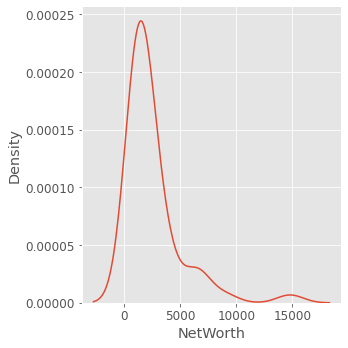

In [15]:
sns.displot(df, x='NetWorth', kind='kde')

In [16]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

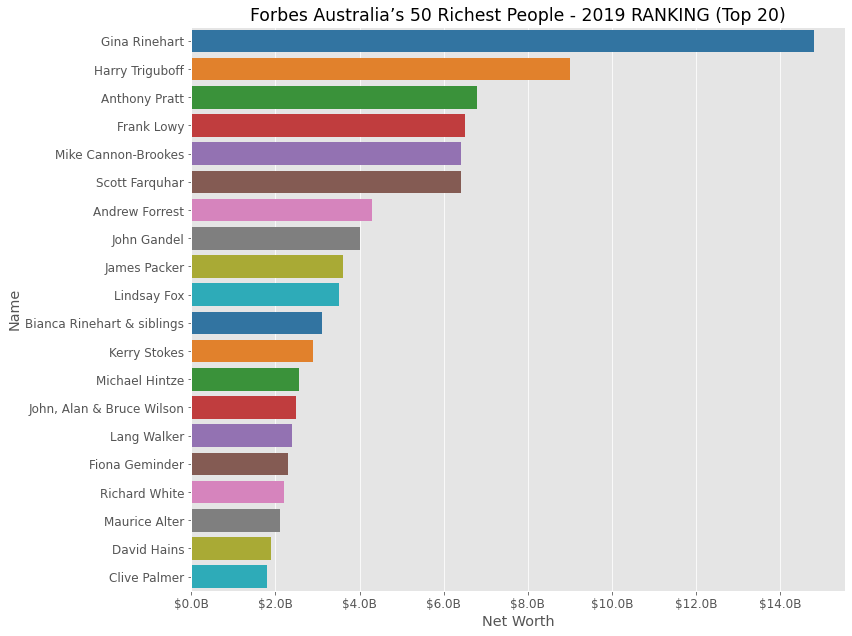

In [17]:
fig, ax = plt.subplots()
sns.barplot(
  data=df.sort_values(by='Rank', ascending=True)[:20],
  x='NetWorth', y='Name',
  palette='tab10')

ax.set(title="Forbes Australia’s 50 Richest People - 2019 RANKING (Top 20)", xlabel='Net Worth', ylabel='Name')
ax.xaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [18]:
df.groupby('OriginOfWealth')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=False)

,NetWorth
OriginOfWealth,
mining,26560.0
real estate,20180.0
software,15000.0
shopping malls,10500.0
manufacturing,9100.0
casinos,5200.0
"logistics, real estate",4450.0
retailing,4000.0
investment,3790.0


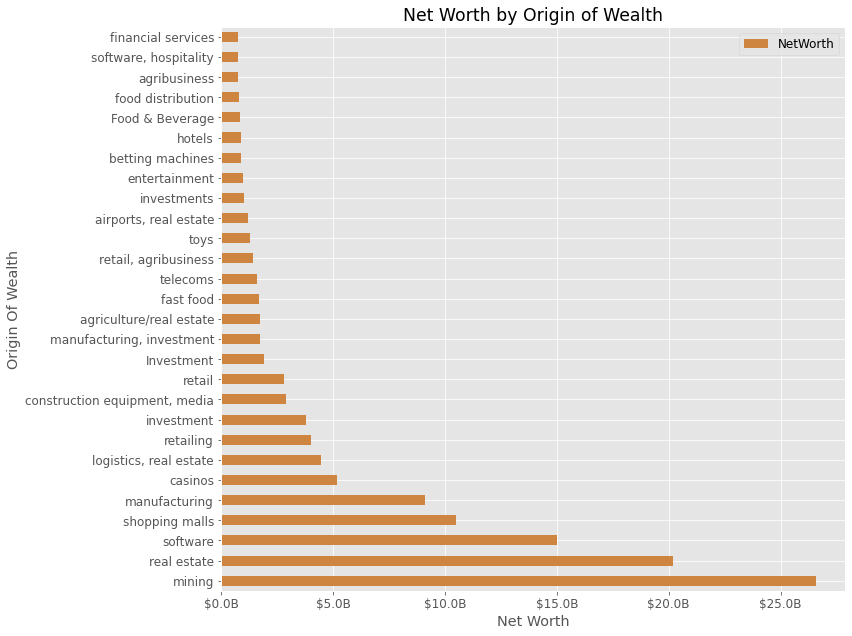

In [19]:
ax = df.groupby('OriginOfWealth')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=False)\
  .plot(kind='barh', color='peru')\

ax.set(title='Net Worth by Origin of Wealth', xlabel='Net Worth', ylabel='Origin Of Wealth')
ax.xaxis.set_major_formatter(format_bill)